In [1]:
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from fytok.Tokamak import Tokamak
from fytok.utils.load_scenario import load_scenario
from fytok.utils.plot_profiles import plot_profiles, sp_figure
from scipy import constants
from spdm.data.Expression import Variable
from spdm.data.File import File
from spdm.utils.logger import logger

2023-06-14 09:52:09,030 INFO [spdm] : Set mapping path: /home/salmon/workspace/fytok/python/fytok/_mapping


In [2]:
scenario = load_scenario("/home/salmon/workspace/data/15MA inductive - burn")

2023-06-14 09:52:10,561 INFO [spdm] : Load scenario/equilibrium from /home/salmon/workspace/data/15MA inductive - burn/Standard domain R-Z/Medium resolution - 129x257/g900003.00230_ITER_15MA_eqdsk16MR.txt
2023-06-14 09:52:10,567 INFO [spdm] : Load module spdm.plugins.data.PluginGEQdsk from /home/salmon/workspace/SpDB/python/spdm/plugins/data/PluginGEQdsk.py
2023-06-14 09:52:10,570 DEBUG [spdm] /home/salmon/workspace/SpDB/python/spdm/plugins/data/PluginGEQdsk.py:329:__init__: Open File URITuple(protocol='local', authority='', path=PosixPath('/home/salmon/workspace/data/15MA inductive - burn/Standard domain R-Z/Medium resolution - 129x257/g900003.00230_ITER_15MA_eqdsk16MR.txt'), query=None, fragment='', format='', schema='') mode=Mode.read
2023-06-14 09:52:10,604 INFO [spdm] : Load scenario/profiles from /home/salmon/workspace/data/15MA inductive - burn/15MA Inductive at burn-ASTRA.xls


In [3]:
tok = Tokamak("ITER",
              name=scenario["name"],
              description=scenario["description"],
              core_profiles={**scenario["core_profiles"],
                             #  "$default_value": {
                             #      "profiles_1d": {"grid": {
                             #          "rho_tor_norm": np.linspace(0, 1.0, 100),
                             #          "psi": np.linspace(0, 1.0, 100),
                             #          "psi_magnetic_axis": 0.0,
                             #          "psi_boundary": 1.0,
                             #      }}}
                             },
              equilibrium={**scenario["equilibrium"],
                           "code": {"name":  "freegs", "parameters": {"boundary": "free"}},
                           "$default_value": {"time_slice": {
                               "boundary": {"psi_norm": 0.99},
                               "coordinate_system": {"grid": {"dim1": 256, "dim2": 128}}
                           }}}
              )




2023-06-14 09:52:11,834 INFO [spdm] : Load module spdm.plugins.data.PluginXML from /home/salmon/workspace/SpDB/python/spdm/plugins/data/PluginXML.py


2023-06-14 09:52:17,452 INFO [spdm] : Load module fytok.plugins.equilibrium.freegs from /home/salmon/workspace/fymodule-restricted/python/fytok/plugins/equilibrium/freegs.py
2023-06-14 09:52:17,460 DEBUG [spdm] /home/salmon/workspace/fytok/python/fytok/modules/Equilibrium.py:102:update: Update Equlibrium at time=0.0
2023-06-14 09:52:17,462 INFO [spdm] : Update Equilibrium: EquilibriumFreeGS
2023-06-14 09:52:17,501 DEBUG [spdm] /home/salmon/workspace/fymodule-restricted/python/fytok/plugins/equilibrium/freegs.py:71:_update_machine: Setup machine description: wall={'name': 'ITER', 'index': 1, 'description': 'for equilibrium codes (single closed limiter and vessel);'}
2023-06-14 09:52:17,506 INFO [spdm] : Load module spdm.mesh.RectangularMesh from /home/salmon/workspace/SpDB/python/spdm/mesh/RectangularMesh.py
2023-06-14 09:52:17,509 DEBUG [spdm] /home/salmon/workspace/fymodule-restricted/python/fytok/plugins/equilibrium/freegs.py:105:update: Using free boundary
2023-06-14 09:52:22,938 DE

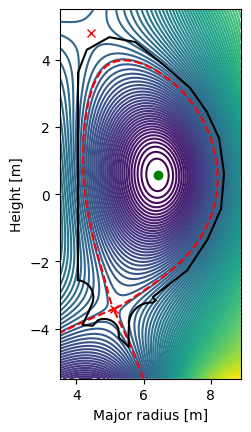

psi_relchange: 8.222412008171688
bndry_relchange: 0.002
bndry_change: 10.0


psi_relchange: 0.4991305325792679
bndry_relchange: 0.002
bndry_change: 10.0


psi_relchange: 0.18258074857372564
bndry_relchange: 0.002
bndry_change: 10.0


psi_relchange: 0.07044452376220874
bndry_relchange: 0.002
bndry_change: 10.0


psi_relchange: 0.030135236670318036
bndry_relchange: 0.002
bndry_change: 10.0


psi_relchange: 0.01567709070066016
bndry_relchange: 0.002
bndry_change: 10.0


psi_relchange: 0.009928284332909125
bndry_relchange: 0.002
bndry_change: 10.0


psi_relchange: 0.00726800509359076
bndry_relchange: 0.002
bndry_change: 10.0


psi_relchange: 0.005770177730655443
bndry_relchange: 0.002
bndry_change: 10.0


psi_relchange: 0.004761071921888566
bndry_relchange: 0.002
bndry_change: 10.0


psi_relchange: 0.00399593933740709
bndry_relchange: 0.002
bndry_change: 10.0


psi_relchange: 0.003379130468032217
bndry_relchange: 0.002
bndry_change: 10.0


psi_relchange: 0.002867339827904512
bndry_relchang

In [4]:
tok.update()

In [7]:
psirz=tok.equilibrium.time_slice[0].profiles_2d[0].psi.__value__

2023-06-14 09:53:37,160 ERROR [spdm] /home/salmon/workspace/SpDB/python/spdm/data/sp_property.py:123:__get_property__: Can not find property "type"


StopIteration: 

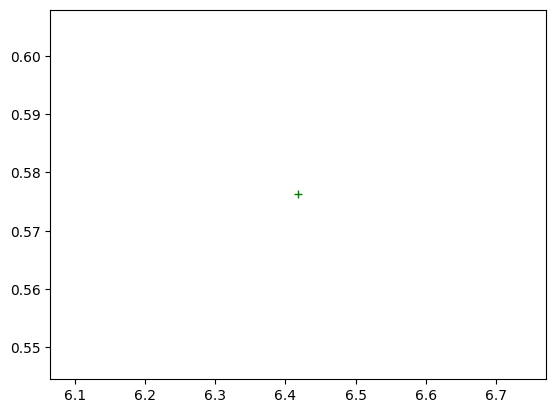

In [6]:
sp_figure(tok.equilibrium)

In [21]:
tok.equilibrium.time_slice[0].coordinate_system

In [7]:
d=np.linspace(0,1.0,10)

In [8]:
d.append(1.0)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
d.